## Major Dependencies

This project relies on the following major dependencies:

- **Python**: The primary programming language used.
- **Libraries**:
  - `scikit-learn`: For machine learning algorithms and data preprocessing.
  - `xgboost`: An efficient implementation of gradient boosting framework.
  - `numpy`: Essential for numerical operations.
  - `matplotlib`: For plotting and visualization of data.
  - `onnxconverter-common`: Common utilities for ONNX model conversion.
  - `onnxmltools`: Tools for converting machine learning models to ONNX format.
  - `skl2onnx`: Specifically for converting scikit-learn models to ONNX format.
  - `google.colab`: Python notebook format.


## Library Installation

In [ ]:
# # Install necessary libraries for ONNX conversion
%pip install onnxconverter-common onnxmltools skl2onnx matplotlib scikit-learn numpy xgboost google-colab

## Data Download and Extraction

In [ ]:
# # Download the dataset and unzip it
!wget https://storage.googleapis.com/fishazam-sample-dataset/spectrum_dataset.zip

--2024-01-31 13:59:14--  https://storage.googleapis.com/fishazam-sample-dataset/spectrum_dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 518777 (507K) [application/zip]
Saving to: ‘spectrum_dataset.zip’

spectrum_dataset.zi 100%[===================>] 506.62K   683KB/s    in 0.7s    

2024-01-31 13:59:16 (683 KB/s) - ‘spectrum_dataset.zip’ saved [518777/518777]



In [ ]:
# # Import required libraries and define file paths
!unzip spectrum_dataset.zip

Archive:  spectrum_dataset.zip
   creating: spectrum_dataset/
  inflating: spectrum_dataset/alaskancod_200wled_corrected_frozen2.csv  
  inflating: spectrum_dataset/alaskancod_200wled_corrected_frozen.csv  
  inflating: spectrum_dataset/alaskanhalibut_200wdaylight_frozen2.csv  
  inflating: spectrum_dataset/alaskanhalibut_200wdaylight_frozen3.csv  
  inflating: spectrum_dataset/alaskanhalibut_200wdaylight_frozen4.csv  
  inflating: spectrum_dataset/alaskanhalibut_200wdaylight_frozen.csv  
  inflating: spectrum_dataset/baseline_200wbaseline2.csv  
  inflating: spectrum_dataset/baseline_200w_led_baseline.csv  
  inflating: spectrum_dataset/canadarockfish_200wled_corrected_frozen2.csv  
  inflating: spectrum_dataset/canadarockfish_200wled_corrected_frozen.csv  
  inflating: spectrum_dataset/pacificcod_200wdaylight_frozen2.csv  
  inflating: spectrum_dataset/pacificcod_200wdaylight_frozen3.csv  
  inflating: spectrum_dataset/pacificcod_200wdaylight_frozen4.csv  
  inflating: spectrum_datas

## Import Libraries and Setup Paths

In [ ]:
# Import Path from pathlib for file path operations
from pathlib import Path
# Import Pipeline from sklearn for creating a ML pipeline
from sklearn.pipeline import Pipeline
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Import XGBClassifier for the classification model
from xgboost import XGBClassifier
# Import numpy for numerical operations
import numpy as np  # Import the required Python module
# Import pyplot from matplotlib for plotting
from matplotlib import pyplot as plt
# Import sklearn metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# Import files from google.colab for file operations
from google.colab import files

## Data Preparation

Notice that path for training and testing is the same

In [ ]:
TRAIN_PATH = Path("/content/spectrum_dataset")
TEST_PATH = Path("/content/spectrum_dataset")

LABELS = ['alaskacod', 'alaskanhalibut', 'other', 'pacificcod', 'petralesole', 'rockfish','tilapia']
FLAT_SIZE=3200


## Model Pipeline Creation

In [ ]:
# Define a function to load, resize, and flatten image data, and prepare labels
def load_data(dataset_path: Path) -> (list, list, dict):
    data = []
    labels = []
    label_dict = {}
    for f in sorted(dataset_path.glob("**/*.csv")):
        if f.is_dir():
            continue
        current = np.genfromtxt(f, delimiter=',')
        data.append(current[1:].flatten())

        lbl = f.stem.split("_")[0]
        if lbl not in label_dict:
            label_dict[lbl] = len(label_dict)

        labels.append(label_dict[lbl])

    return data, labels, label_dict

## Load Train and Test Data

In [ ]:
X_train, y_train, train_labels = load_data(TRAIN_PATH)
X_test, y_test, test_labels = load_data(TEST_PATH)

## Model Prediction and Evaluation

In [ ]:
# Create a pipeline for data preprocessing and model training
pipe = Pipeline([
        # The first step in the pipeline: Standardize features by removing the mean and scaling to unit variance
        ("scaler", StandardScaler()),
        # The second step in the pipeline: Train a classifier using the XGBoost algorithm
        # with specified parameters (1 estimator and verbosity level 2)
        # ("pca", PCA()),  # Add optional PCA decomposition
        ("xgb", XGBClassifier(n_estimators=3, enable_categorical=True, verbosity=2))
    ])

In [ ]:
pipe.fit(X_train, y_train)   # Train on labeled data

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=True, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=3, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
preds = pipe.predict(X_test)  # Predict unlabeled data

                precision    recall  f1-score   support

    alaskancod       1.00      1.00      1.00         2
alaskanhalibut       1.00      1.00      1.00         4
      baseline       1.00      1.00      1.00         2
canadarockfish       1.00      1.00      1.00         2
    pacificcod       1.00      1.00      1.00         4
   petralesole       1.00      1.00      1.00         2
       tilapia       1.00      1.00      1.00         2

      accuracy                           1.00        18
     macro avg       1.00      1.00      1.00        18
  weighted avg       1.00      1.00      1.00        18



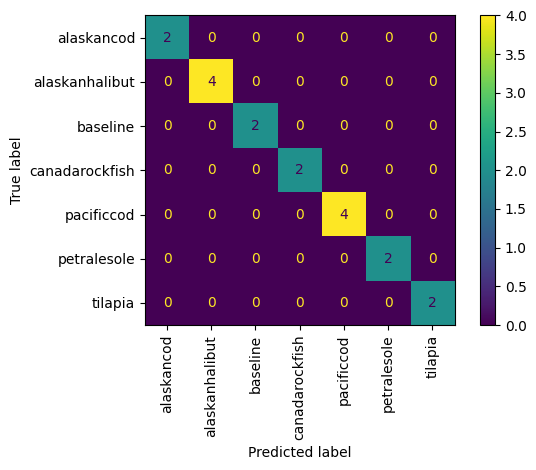

In [ ]:
cm = confusion_matrix(y_test, preds)  # a specific table layout that allows visualization of the performance of an algorithm
print(classification_report(y_test, preds, target_names=test_labels))
disp = ConfusionMatrixDisplay(cm, display_labels=test_labels)
disp.plot(xticks_rotation="vertical")
plt.tight_layout()
plt.show()  # Plot predictions, a good result should have a diagonal from top left to bottom right

Model accuracy defined by number of correct guesses vs incorrect guesses.

## Convert Trained Model to ONNX for Applications.

ONNX lets us package the trained python models optimized for runtime applications (e.g. web applications)

In [ ]:
from onnxconverter_common import FloatTensorType
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost
from skl2onnx import update_registered_converter, convert_sklearn
from skl2onnx.common.shape_calculator import calculate_linear_classifier_output_shapes

In [ ]:
# Define options for the converter
opts = {
    "nocl": [True, False],  # Option for 'nocl': Indicates whether to use 'no class labels' in the output
    "zipmap": [True, False, "columns"],  # Option for 'zipmap': Determines how to output class probabilities,
                                         # either as a dictionary (True), array (False), or as columns ("columns")
    "output_class_labels": [True, False]  # Option for 'output_class_labels': Indicates whether to output class labels
}

# Update or register a new converter for XGBClassifier with the ONNX converter
update_registered_converter(
    XGBClassifier,  # The scikit-learn classifier class that we want to convert to ONNX
    "XGBoostXGBClassifier",  # The name for the converter (as registered in ONNX)
    calculate_linear_classifier_output_shapes,  # Function to calculate the output shape of the converted model
    convert_xgboost,  # Function that defines how to convert the classifier to an ONNX model
    options=opts,  # Passing the options defined above to customize the conversion process
)

In [ ]:
# Convert the scikit-learn pipeline to ONNX format
model_onnx = convert_sklearn(
    pipe,  # The scikit-learn model or pipeline to convert, here 'pipe' refers to a predefined pipeline
    "fishazam-xgboost-classifier",  # Name for the ONNX model
    [("input", FloatTensorType([1, FLAT_SIZE]))],  # Define the model input name and type
    # 'input' is the name of the input tensor,
    # FloatTensorType([1, FLAT_IMG_SIZE]) specifies the data type and shape of the input tensor
    target_opset={"": 12, "ai.onnx.ml": 2},  # Specify the target ONNX operator set versions
    # "" refers to the default ONNX domain, with version 12
    # "ai.onnx.ml" refers to the machine learning domain, with version 2
    options={id(pipe): {"zipmap": False, "output_class_labels": False, "nocl": True}}
    # Set conversion options for the pipeline
    # "zipmap": False - Do not convert class probabilities to a dictionary format
    # "output_class_labels": False - Do not output the class labels
    # "nocl": True - Indicate that there are no class labels in the output
)

In [ ]:
with open("fishazam-xgboost-classifier-spectrum.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

files.download("fishazam-xgboost-classifier-spectrum.onnx")  # Save the trained model compilation.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Use [https://netron.app/](https://netron.app/) to evaluate the ONNX outputs. You need to format i/o into tensors with specific buffer types which are limited to:

- bool
- float16
- float32
- float64
- int16
- int32
- int8
- string
- uint16
- uint32
- uint64
- uint8

# Model Inference using ONNX

## Install dependencies

In [ ]:
%pip install numpy onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


## Import packages

In [ ]:
# Import numpy for numerical operations
import numpy as np
# Import ONNX runtime to run the inference
import onnxruntime as rt

## Run inference

### Load model

In [ ]:
# Load model in a session from file
# sess = rt.InferenceSession("/content/fishazam-xgboost-classifier-spectrum.onnx", providers=["CPUExecutionProvider"])
# Or from bytes
sess = rt.InferenceSession(model_onnx.SerializeToString(), providers=["CPUExecutionProvider"])


### Load spectrum data

In [ ]:
data = np.genfromtxt("/content/spectrum_dataset/alaskanhalibut_200wdaylight_frozen.csv", delimiter=',')

# Flatten image and add one axis representing one image in batch, skip header
flat = data[1:].flatten()
flat = flat[np.newaxis, ...]

### Predict

In [ ]:
pred_onx = sess.run(None, {"input": flat.astype(np.float32)})
print("predict", pred_onx[0]) # 1 is alaskanhalibut
print("predict_proba", pred_onx[1][:1]) # Print predicted probabilities for all classes

predict [1]
predict_proba [[0.08574136 0.36749336 0.08583967 0.1182318  0.14002253 0.08587299
  0.11679839]]
